In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [49]:
df = pd.read_csv("processed_data_2_og.csv",encoding = "utf-8")

In [50]:
df['Prices_normalized'] = (df['Prices'] - df['Prices'].min()) / (df['Prices'].max() - df['Prices'].min())

In [51]:
uppper_boundary=df['Prices'].mean() + 3* df['Prices'].std()
print("Upper bound for price:",uppper_boundary)
df['prices_capped'] = df['Prices']
df.loc[(df.Prices>uppper_boundary),'prices_capped'] = uppper_boundary

Upper bound for price: 43.0618972051879


In [52]:
df['prices_capped'].unique()

array([ 4.1       ,  3.3       , 15.        ,  6.5       , 11.        ,
        7.2       ,  2.9       ,  3.5       ,  4.7       , 25.        ,
        5.2       ,  6.6       ,  5.7       ,  6.7       ,  3.75      ,
        6.8       ,  4.75      ,  6.4       ,  2.75      ,  2.6       ,
        3.8       ,  3.35      ,  2.55      ,  1.75      ,  3.69      ,
        5.95      ,  6.        ,  2.8       ,  3.2       ,  2.15      ,
        3.65      ,  1.65      ,  2.7       ,  3.15      ,  1.85      ,
        2.83      ,  1.49      ,  5.35      ,  3.9       ,  6.35      ,
        5.8       ,  8.5       ,  4.15      ,  4.9       ,  7.5       ,
        5.        ,  4.8       , 18.8       ,  4.4       ,  3.55      ,
       14.        , 24.        ,  3.85      ,  2.85      ,  4.3       ,
        4.2       , 20.        ,  5.4       ,  2.25      ,  2.2       ,
        2.1       ,  1.5       ,  2.05      ,  7.3       , 16.5       ,
       14.2       ,  3.995     , 16.        , 43.06189721,  9.  

In [53]:
df['log_prices'] = np.log(df['Prices'])

<Axes: xlabel='prices_capped', ylabel='Count'>

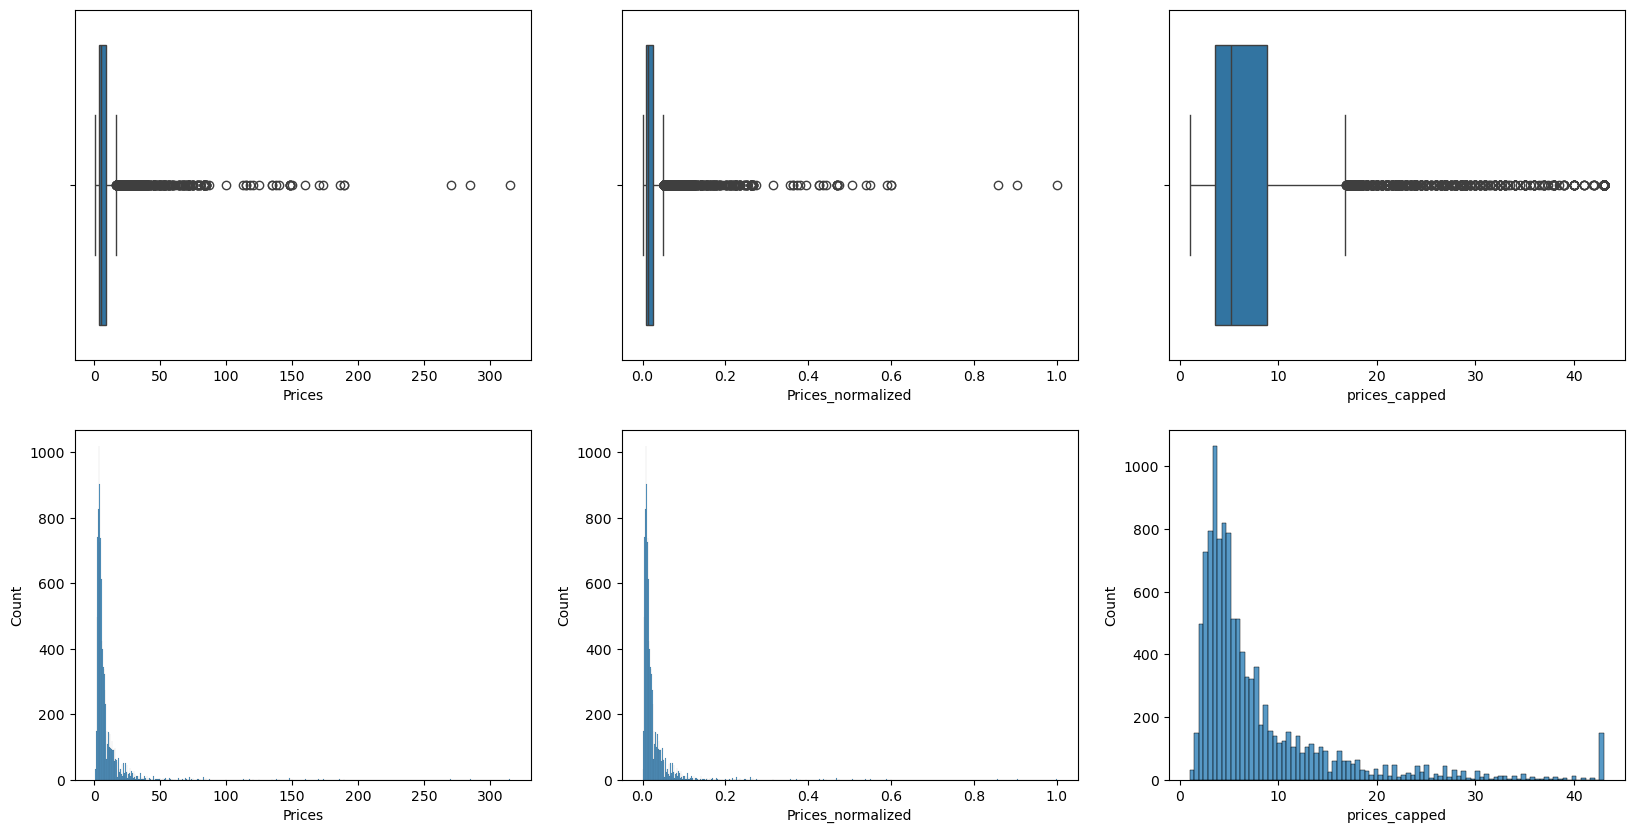

In [54]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(20,10))
sns.boxplot(data=df,x='Prices',ax=axes[0][0])
sns.boxplot(data=df,x='Prices_normalized',ax=axes[0][1])
sns.boxplot(data=df,x='prices_capped',ax=axes[0][2])

sns.histplot(data=df,x='Prices',ax=axes[1][0])
sns.histplot(data=df,x='Prices_normalized',ax=axes[1][1])
sns.histplot(data=df,x='prices_capped',ax=axes[1][2])


### Area

In [55]:
uppper_boundary=df['Area'].mean() + 3* df['Area'].std()
print("Upper bound for area:",uppper_boundary)
df['Area_capped'] = df['Area']
df.loc[(df.Area>uppper_boundary),'Area_capped'] = uppper_boundary
df['log_Area'] = np.log(df['Area'])

Upper bound for area: 276.2692297258002


<Axes: xlabel='log_Area', ylabel='Count'>

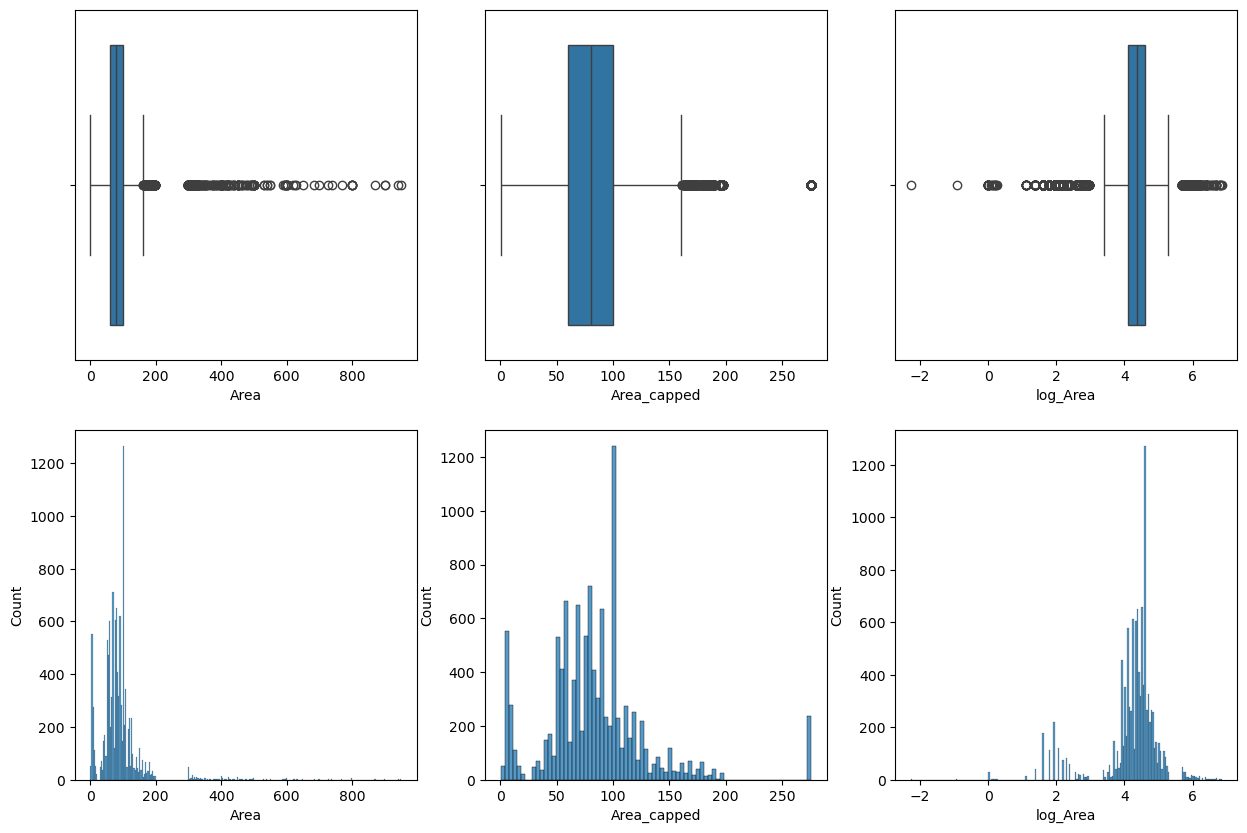

In [56]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='Area',ax=axes[0][0])
sns.boxplot(data=df,x='Area_capped',ax=axes[0][1])
sns.boxplot(data=df,x='log_Area',ax=axes[0][2])
sns.histplot(data=df,x='Area',ax=axes[1][0])
sns.histplot(data=df,x='Area_capped',ax=axes[1][1])
sns.histplot(data=df,x='log_Area',ax=axes[1][2])

### Floors

In [57]:
uppper_boundary=df['floors'].mean() + 3* df['floors'].std()
print("Upper bound for floors:",uppper_boundary)
df['floors_capped'] = df['floors']
df.loc[(df.floors_capped>uppper_boundary),'floors_capped'] = int(uppper_boundary)
# df['log_floors'] = np.log(df['floors'])

Upper bound for floors: 8.99959315952584


<Axes: xlabel='floors_capped', ylabel='Count'>

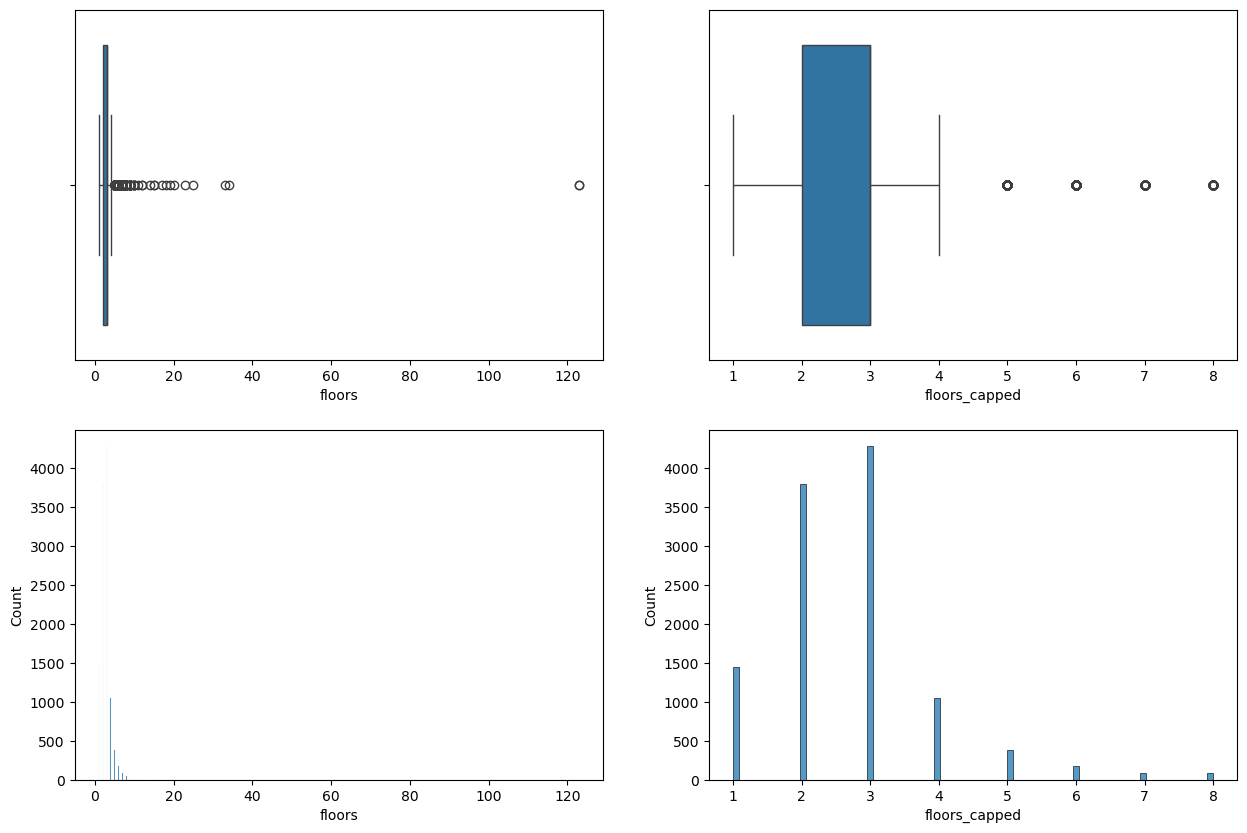

In [58]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='floors',ax=axes[0][0])
sns.boxplot(data=df,x='floors_capped',ax=axes[0][1])
sns.histplot(data=df,x='floors',ax=axes[1][0])
sns.histplot(data=df,x='floors_capped',ax=axes[1][1])

### Width

In [59]:
uppper_boundary=df['width'].mean() + 3* df['width'].std()
print("Upper bound for width:",uppper_boundary)
df['width_capped'] = df['width']
df.loc[(df.width_capped>uppper_boundary),'width_capped'] = uppper_boundary
df['log_width'] = np.log(df['width'])

Upper bound for width: 22.227540267464


<Axes: xlabel='log_width', ylabel='Count'>

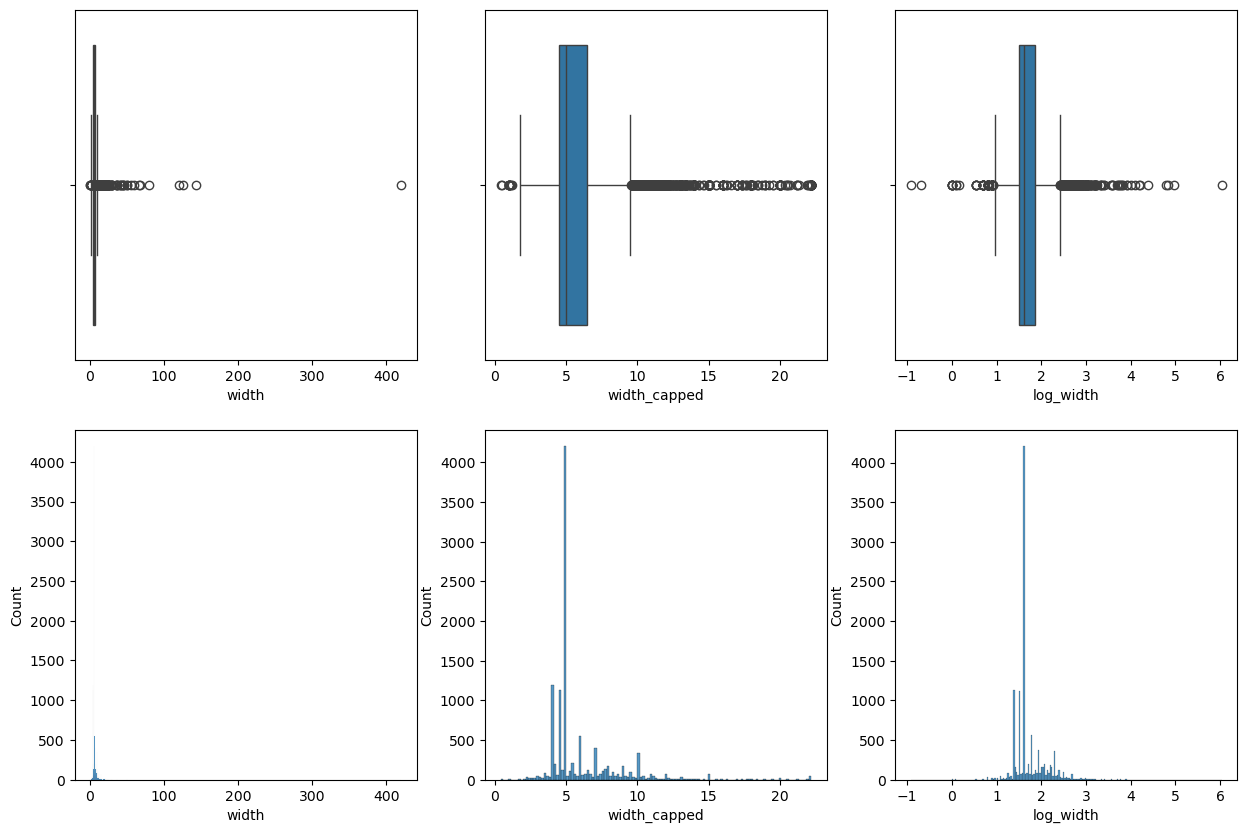

In [60]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='width',ax=axes[0][0])
sns.boxplot(data=df,x='width_capped',ax=axes[0][1])
sns.boxplot(data=df,x='log_width',ax=axes[0][2])
sns.histplot(data=df,x='width',ax=axes[1][0])
sns.histplot(data=df,x='width_capped',ax=axes[1][1])
sns.histplot(data=df,x='log_width',ax=axes[1][2])

### Length

In [61]:
uppper_boundary=df['length'].mean() + 3* df['length'].std()
print("Upper bound for length:",uppper_boundary)
df['length_capped'] = df['length']
df.loc[(df.length_capped>uppper_boundary),'length_capped'] = uppper_boundary
df['log_length'] = np.log(df['length'])

Upper bound for length: 96.85790292073943


<Axes: xlabel='log_length', ylabel='Count'>

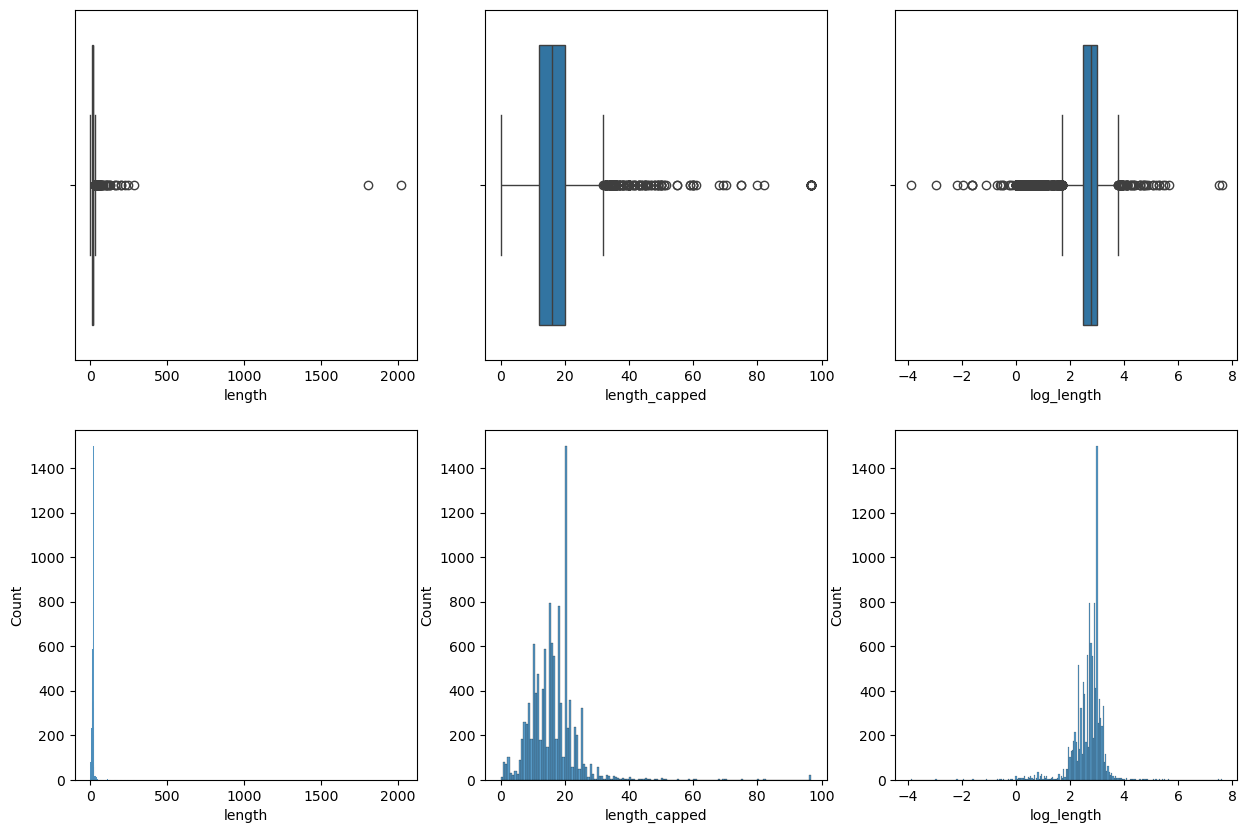

In [62]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='length',ax=axes[0][0])
sns.boxplot(data=df,x='length_capped',ax=axes[0][1])
sns.boxplot(data=df,x='log_length',ax=axes[0][2])
sns.histplot(data=df,x='length',ax=axes[1][0])
sns.histplot(data=df,x='length_capped',ax=axes[1][1])
sns.histplot(data=df,x='log_length',ax=axes[1][2])

### Distance to center

In [63]:
# uppper_boundary=df['distance_to_center'].mean() + 3* df['distance_to_center'].std()
# print("Upper bound for distance_to_center:",uppper_boundary)
# df_copy.loc[(df_copy.distance_to_center>uppper_boundary),'distance_to_center'] = uppper_boundary
# df['log_distance_to_center'] = np.log(df['distance_to_center'])

<Axes: xlabel='distance_to_center', ylabel='Count'>

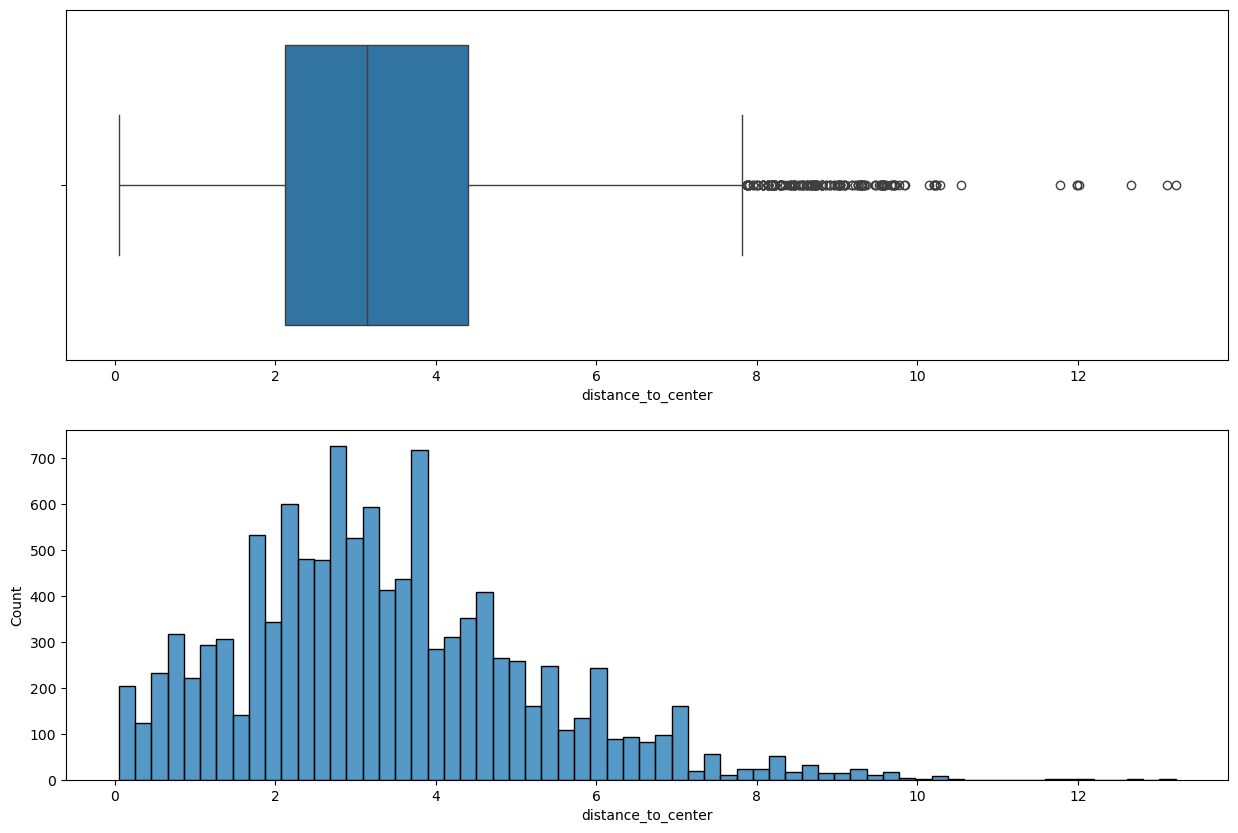

In [64]:
fig, axes = plt.subplots(ncols=1,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='distance_to_center',ax=axes[0])
sns.histplot(data=df,x='distance_to_center',ax=axes[1])

### Distance to beach

In [65]:
uppper_boundary=df['distance_to_beach'].mean() + 3* df['distance_to_beach'].std()
print("Upper bound for distance_to_beach:",uppper_boundary)
df_copy.loc[(df_copy.distance_to_beach>uppper_boundary),'distance_to_beach'] = uppper_boundary

Upper bound for distance_to_beach: 12.457605460265738


NameError: name 'df_copy' is not defined

<Axes: xlabel='distance_to_beach', ylabel='Count'>

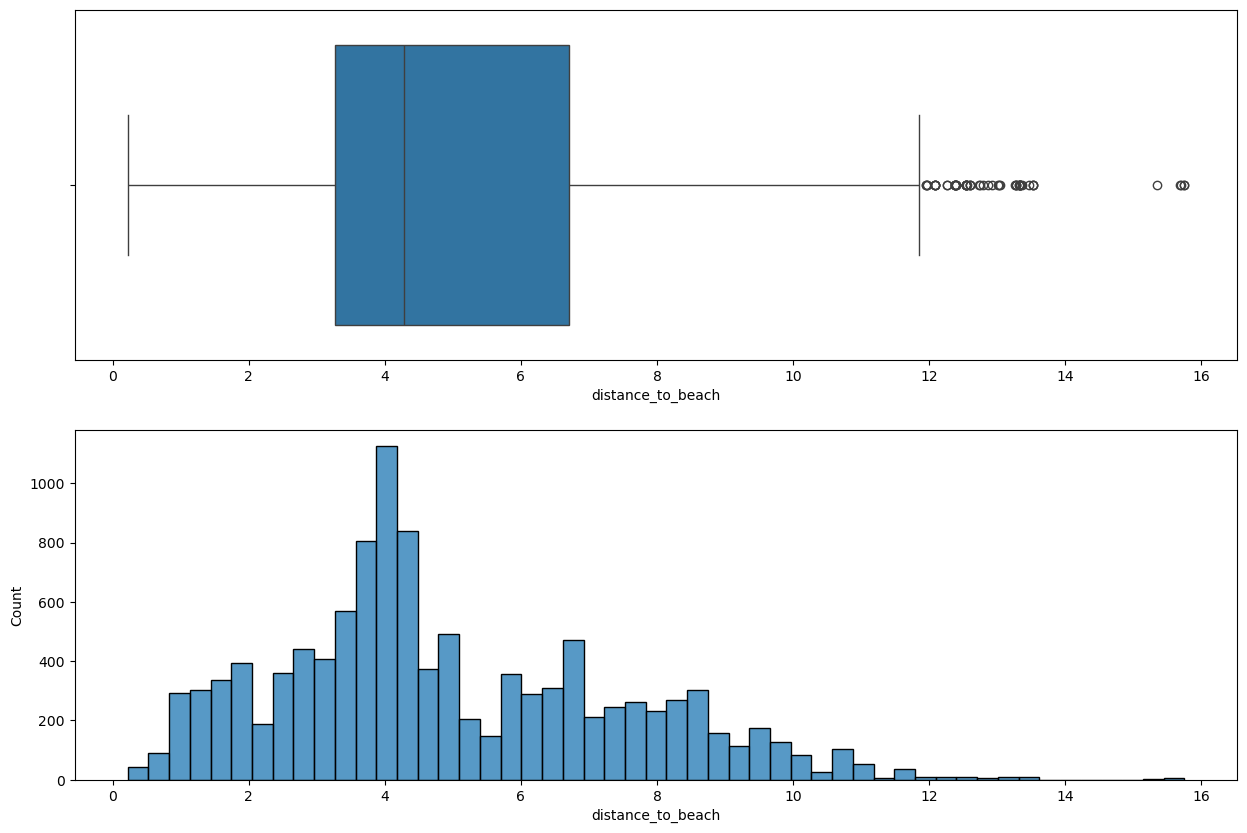

In [19]:
fig, axes = plt.subplots(ncols=1,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='distance_to_beach',ax=axes[0])
sns.histplot(data=df,x='distance_to_beach',ax=axes[1])

In [21]:
uppper_boundary=df['distance_to_airport'].mean() + 3* df['distance_to_airport'].std()
print("Upper bound for distance_to_airport:",uppper_boundary)
df_copy.loc[(df_copy.distance_to_airport>uppper_boundary),'distance_to_airport'] = uppper_boundary

Upper bound for distance_to_airport: 8.650940108862269


### Distance to airport

<Axes: xlabel='distance_to_airport', ylabel='Count'>

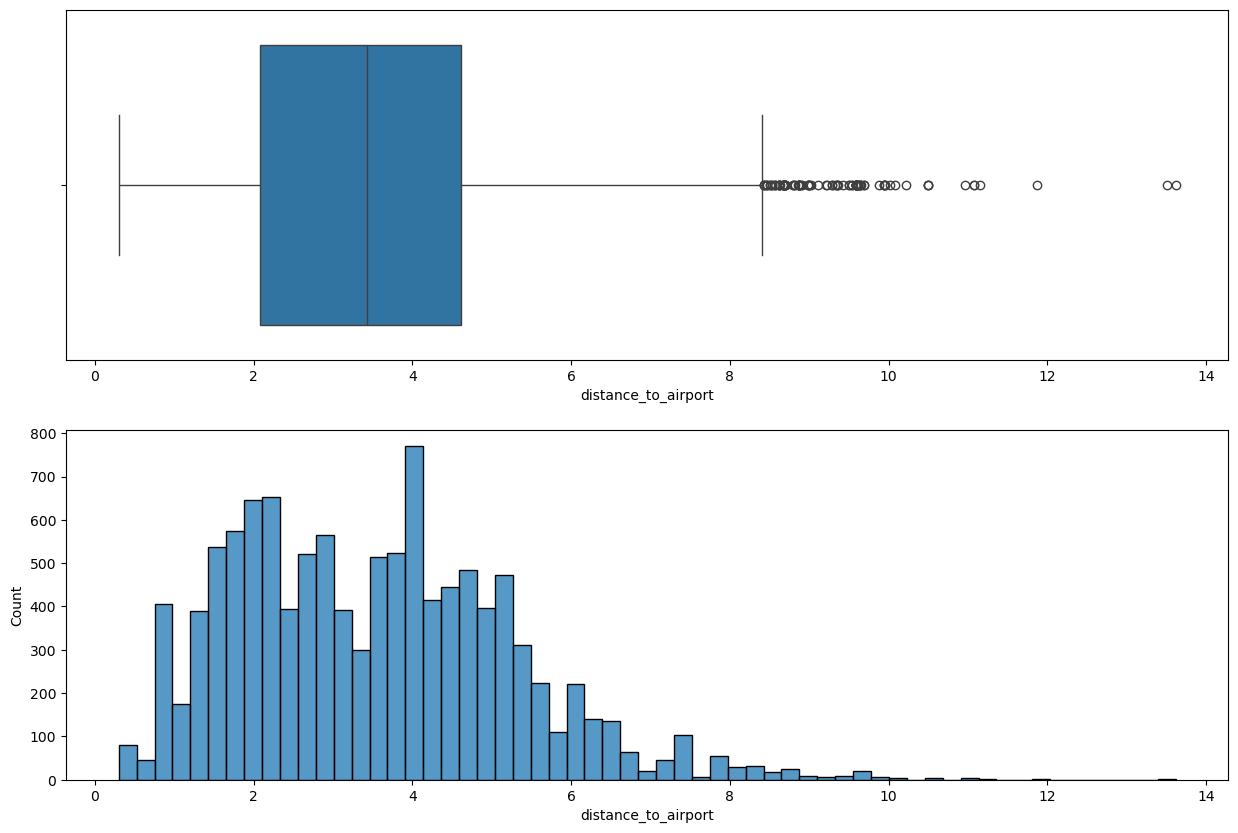

In [21]:
fig, axes = plt.subplots(ncols=1,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='distance_to_airport',ax=axes[0])
sns.histplot(data=df,x='distance_to_airport',ax=axes[1])

## Plotting categories

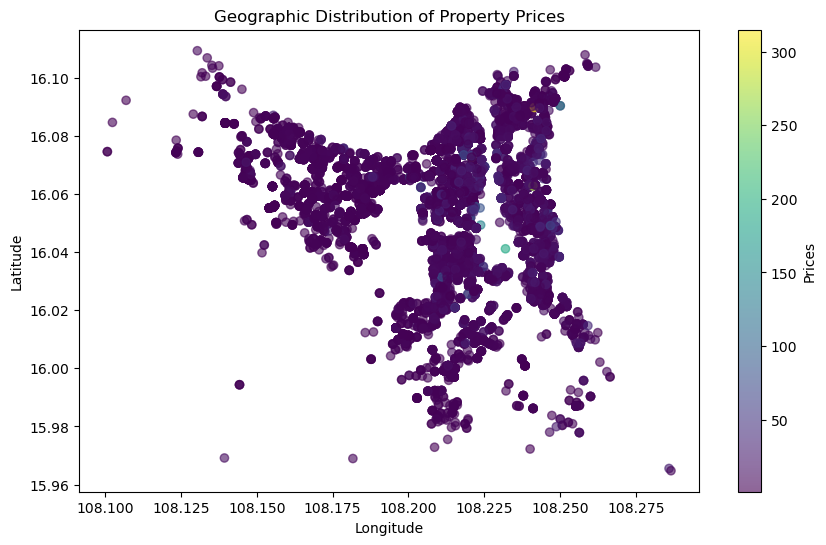

In [23]:
plt.figure(figsize=(10, 6))

sc = plt.scatter(df['Longitude'], df['Latitude'], c=df['Prices'], cmap='viridis', alpha=0.6)
plt.colorbar(sc, label='Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Property Prices')
plt.show()


### Housing prices at different districts

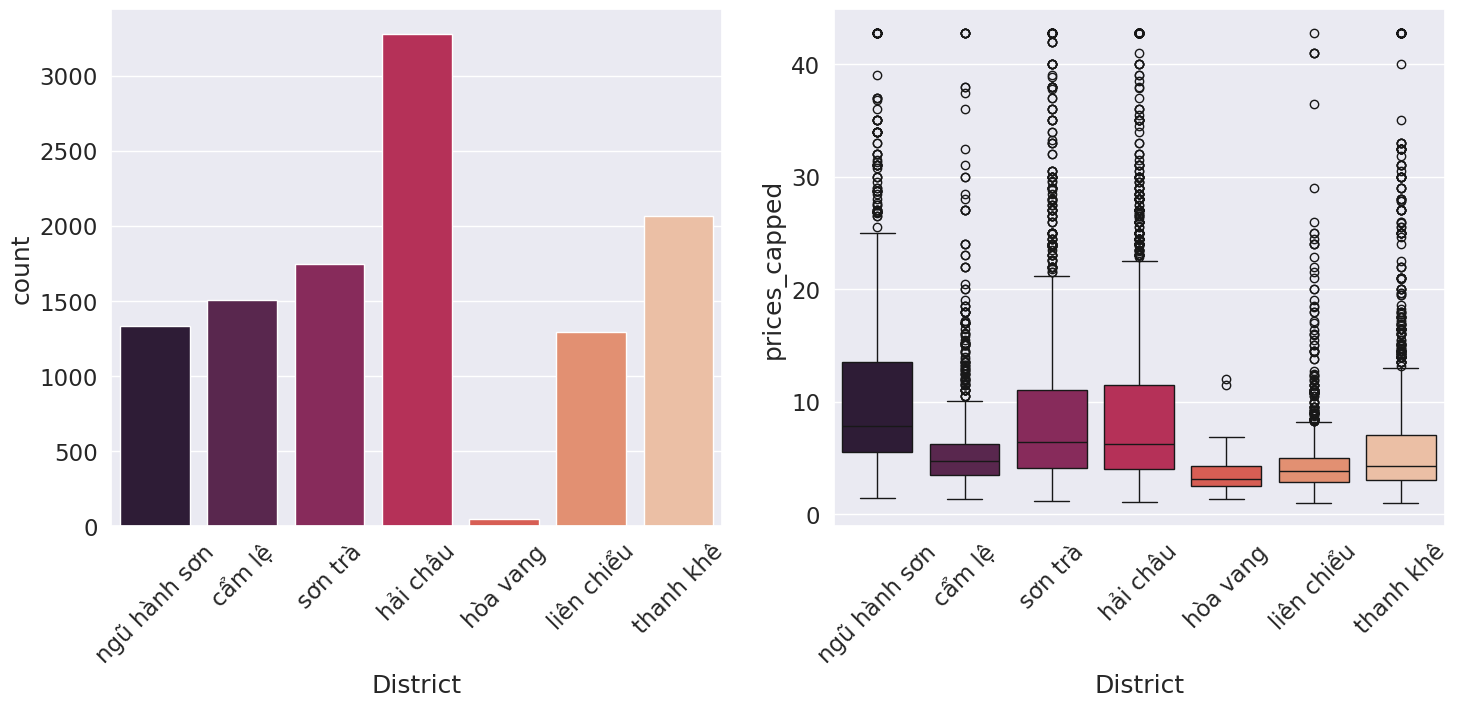

In [97]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    ax1 = sns.countplot(x=df[x],palette=("rocket"), hue =df[x], legend=False)
    ax1.set_xticks(range(len(df[x].unique())))
    ax1.set_xticklabels(df[x].unique(), rotation = 45)
    plt.subplot(3,2,(fig+1))
    ax2 = sns.boxplot(x=df[x], y=df.prices_capped, palette=("rocket"), hue =df[x], legend=False)
    ax2.set_xticks(range(len(df[x].unique())))
    ax2.set_xticklabels(df[x].unique(), rotation = 45)
    
plt.figure(figsize=(15,20))
plot_count('District', 1)
plt.tight_layout()

### Housing prices with certificates compared to non-certificate

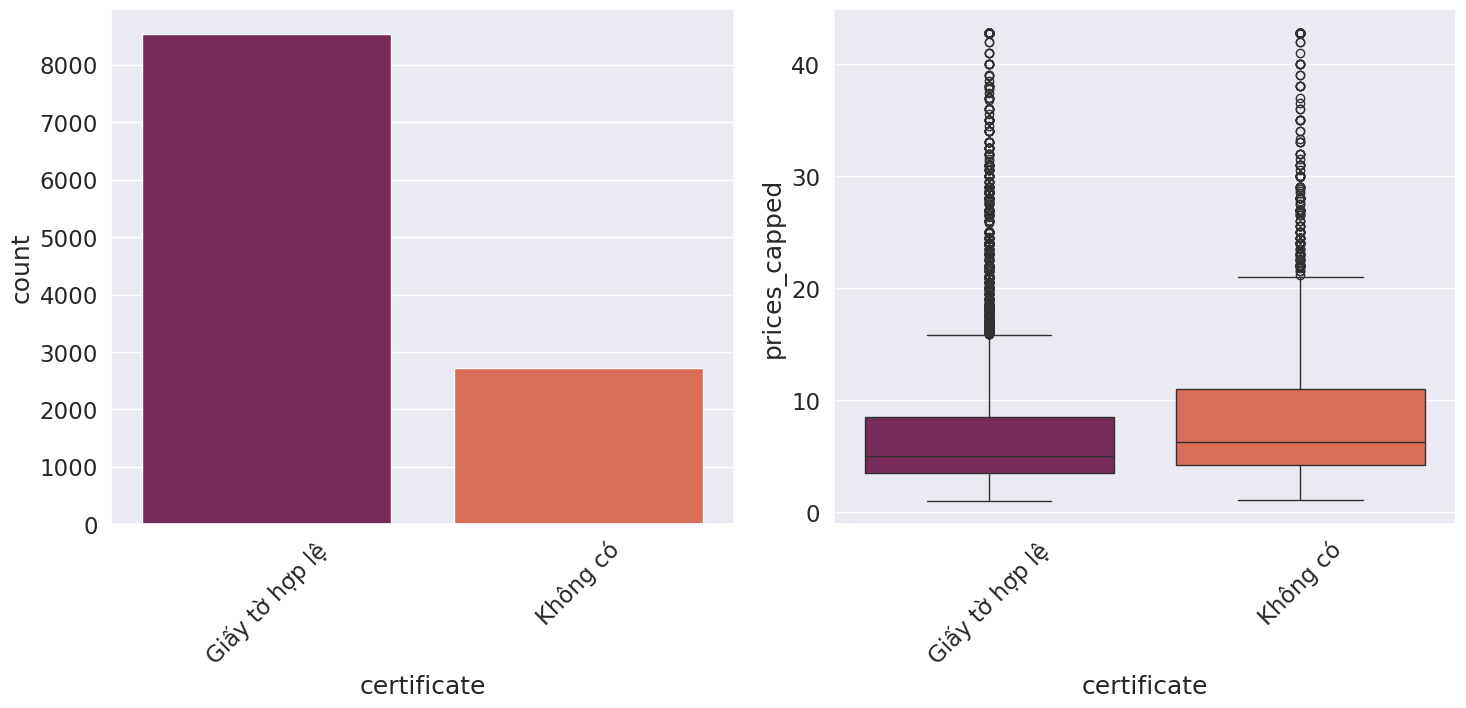

In [82]:
plt.figure(figsize=(15,20))
plot_count('certificate', 1)
plt.tight_layout()

### Housing prices at front compared to alley ones

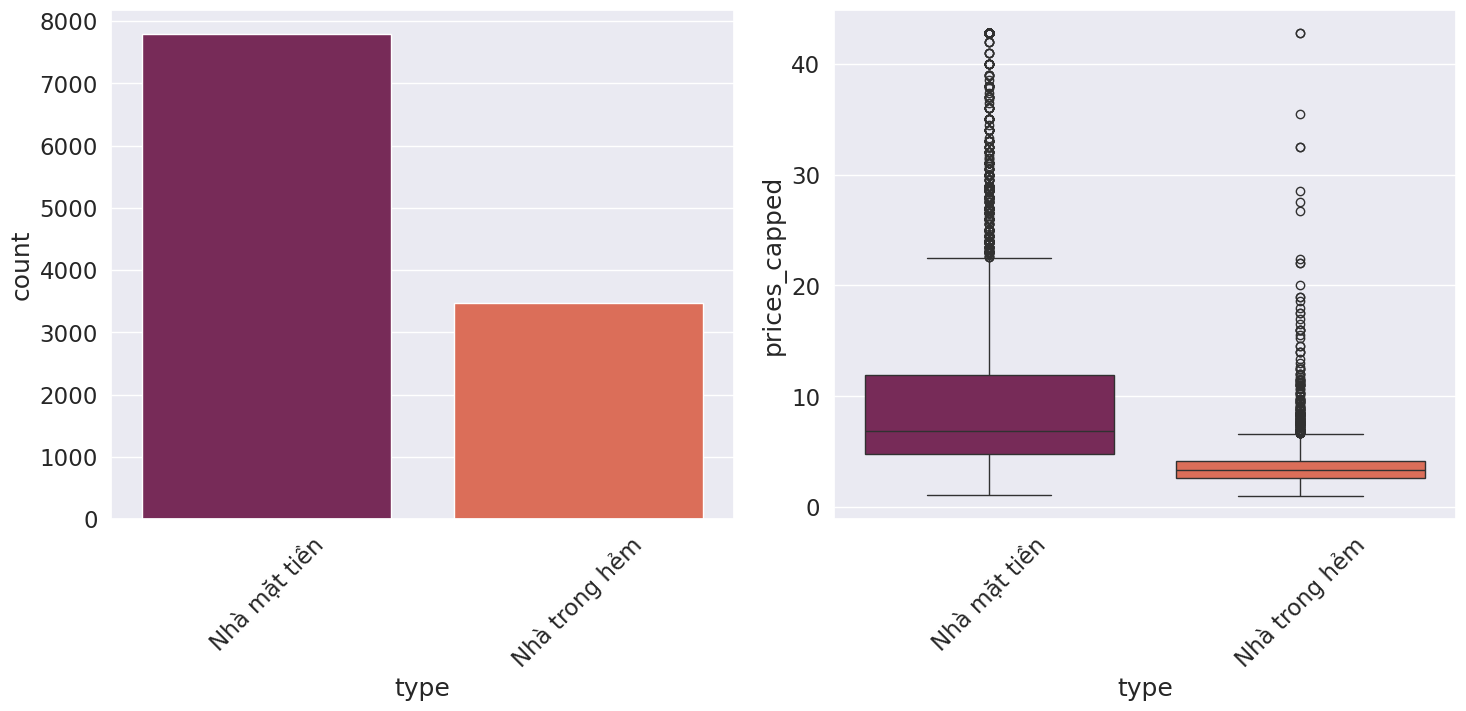

In [83]:
plt.figure(figsize=(15,20))
plot_count('type', 1)
plt.tight_layout()

### Housing prices with different floors

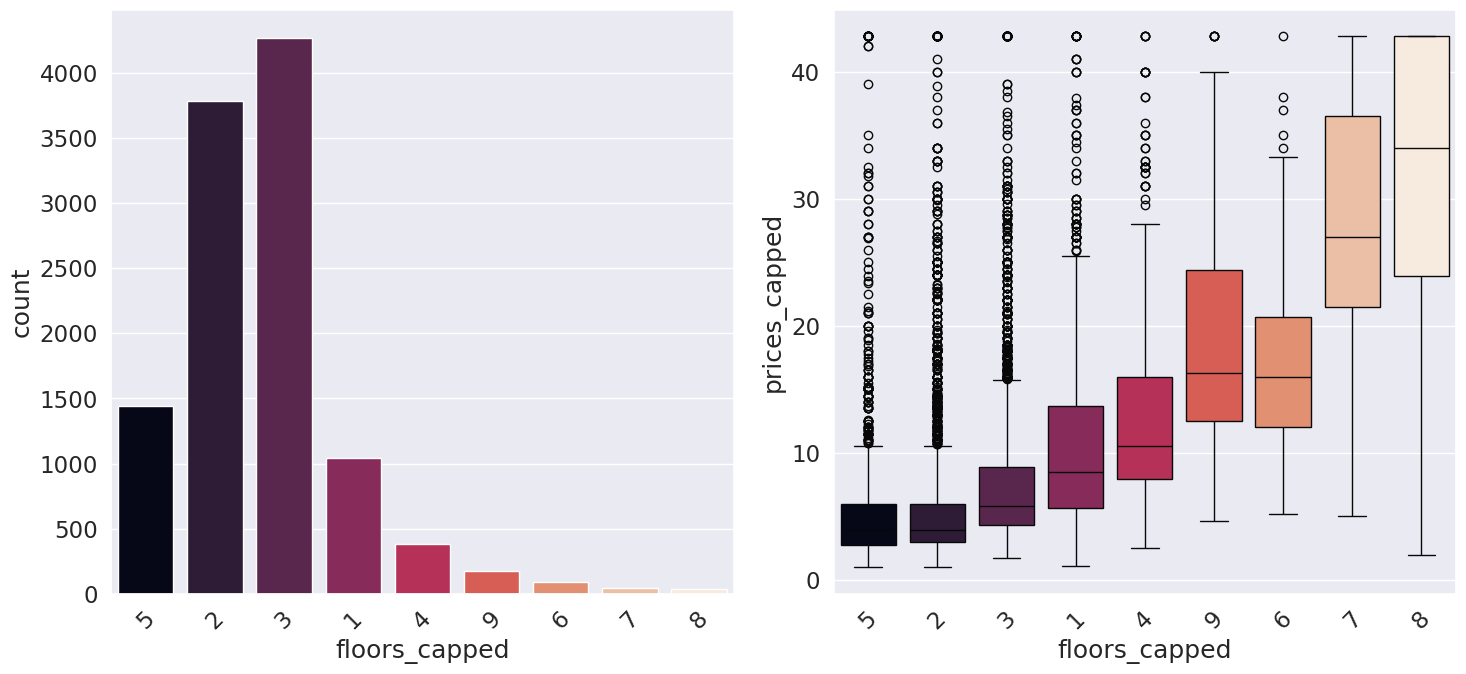

In [102]:
def plot_count_2(x,fig):
    plt.subplot(3,2,fig)
    ax1 = sns.countplot(x=df[x],palette=("rocket"), hue =df[x], legend=False)
    ax1.set_xticks(range(len(df[x].unique())))
    ax1.set_xticklabels(df[x].unique(), rotation = 45)
    plt.subplot(3,2,(fig+1))
    ax2 = sns.boxplot(x=df[x], y=df.prices_capped, palette=("rocket"), hue =df[x], legend=False)
    ax2.set_xticks(range(len(df[x].unique())))
    ax2.set_xticklabels(df[x].unique(), rotation = 45)
plt.figure(figsize=(15,20))
plot_count_2('floors_capped', 1)
plt.tight_layout()

### Housing prices with with each ward within each district

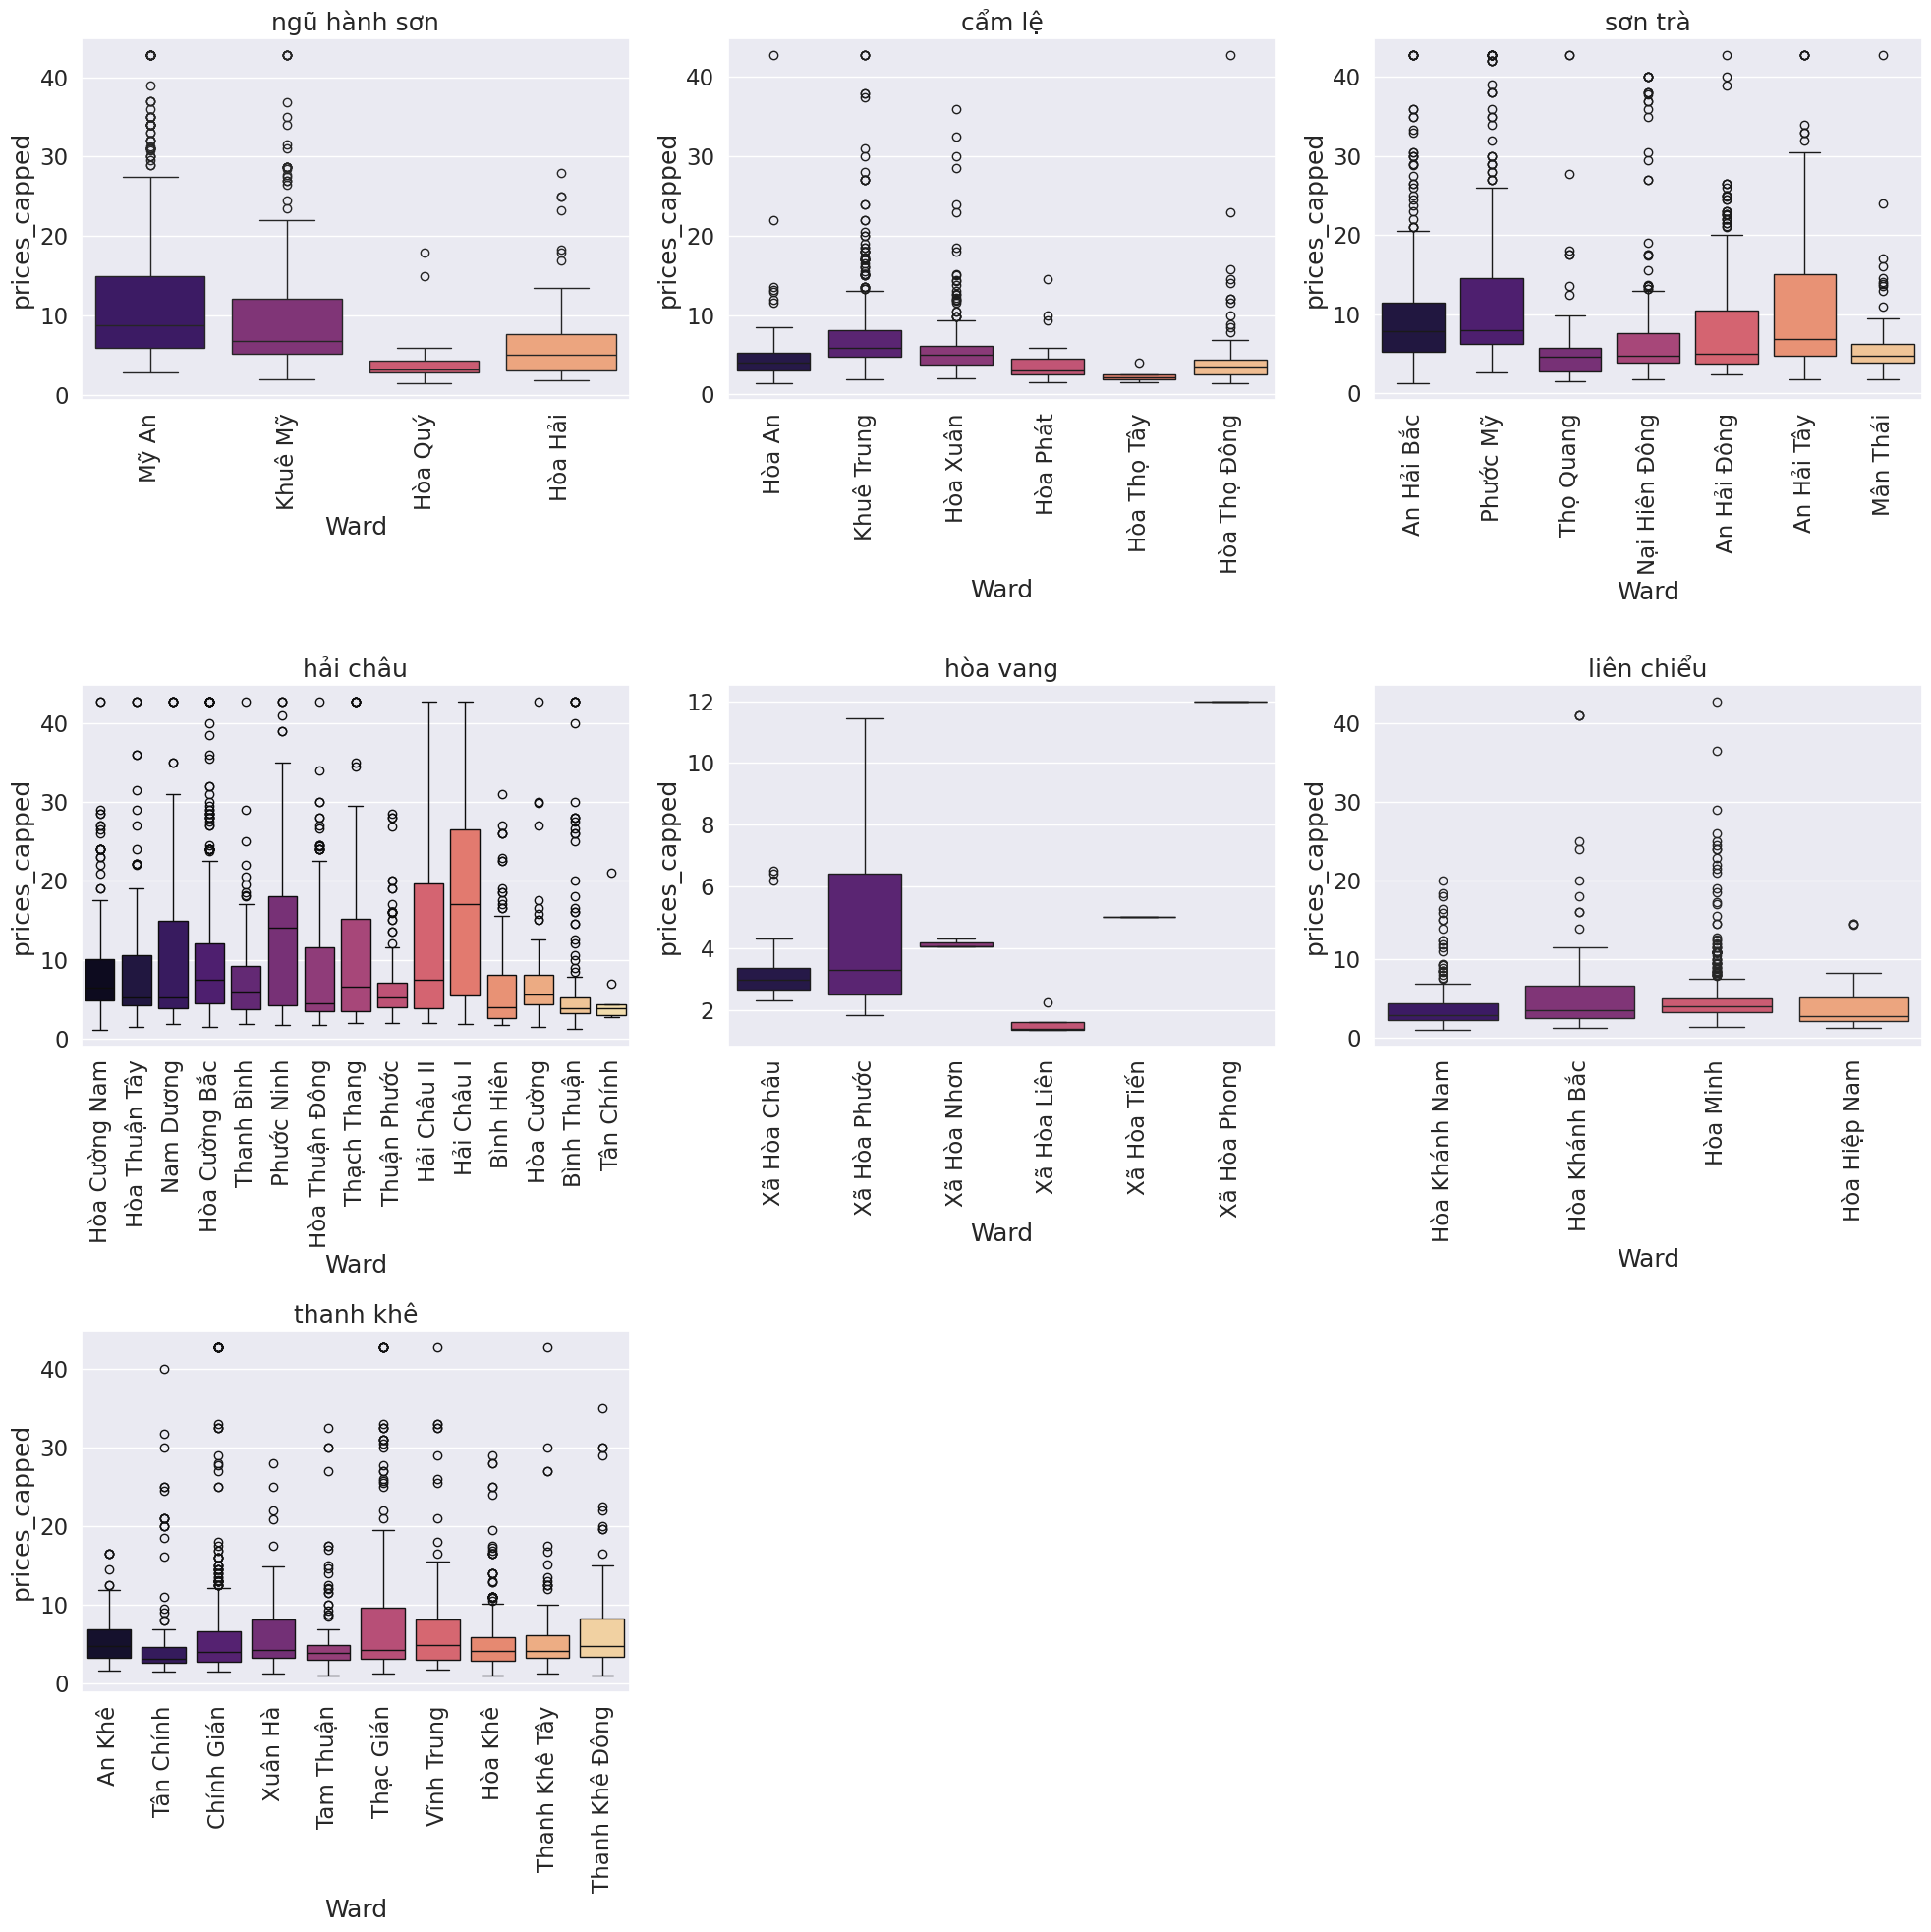

In [103]:
count =1
plt.figure(figsize=(20,20))
for i in df['District'].unique():
    PricesByWard = df[df.District == i]

    sns.set(font_scale = 1.5)
    plt.subplot(3,3,count)
    #plt.scatter(PricesByWard['Ward'],PricesByWard['Prices'])
    sns.boxplot(x=PricesByWard['Ward'], y=PricesByWard['prices_capped'], palette=("magma"), hue = PricesByWard['Ward'], legend = False)
    plt.title(i)

    plt.xticks(rotation=90)
    count+=1


plt.tight_layout()

### Housing prices correlation with area, width, length

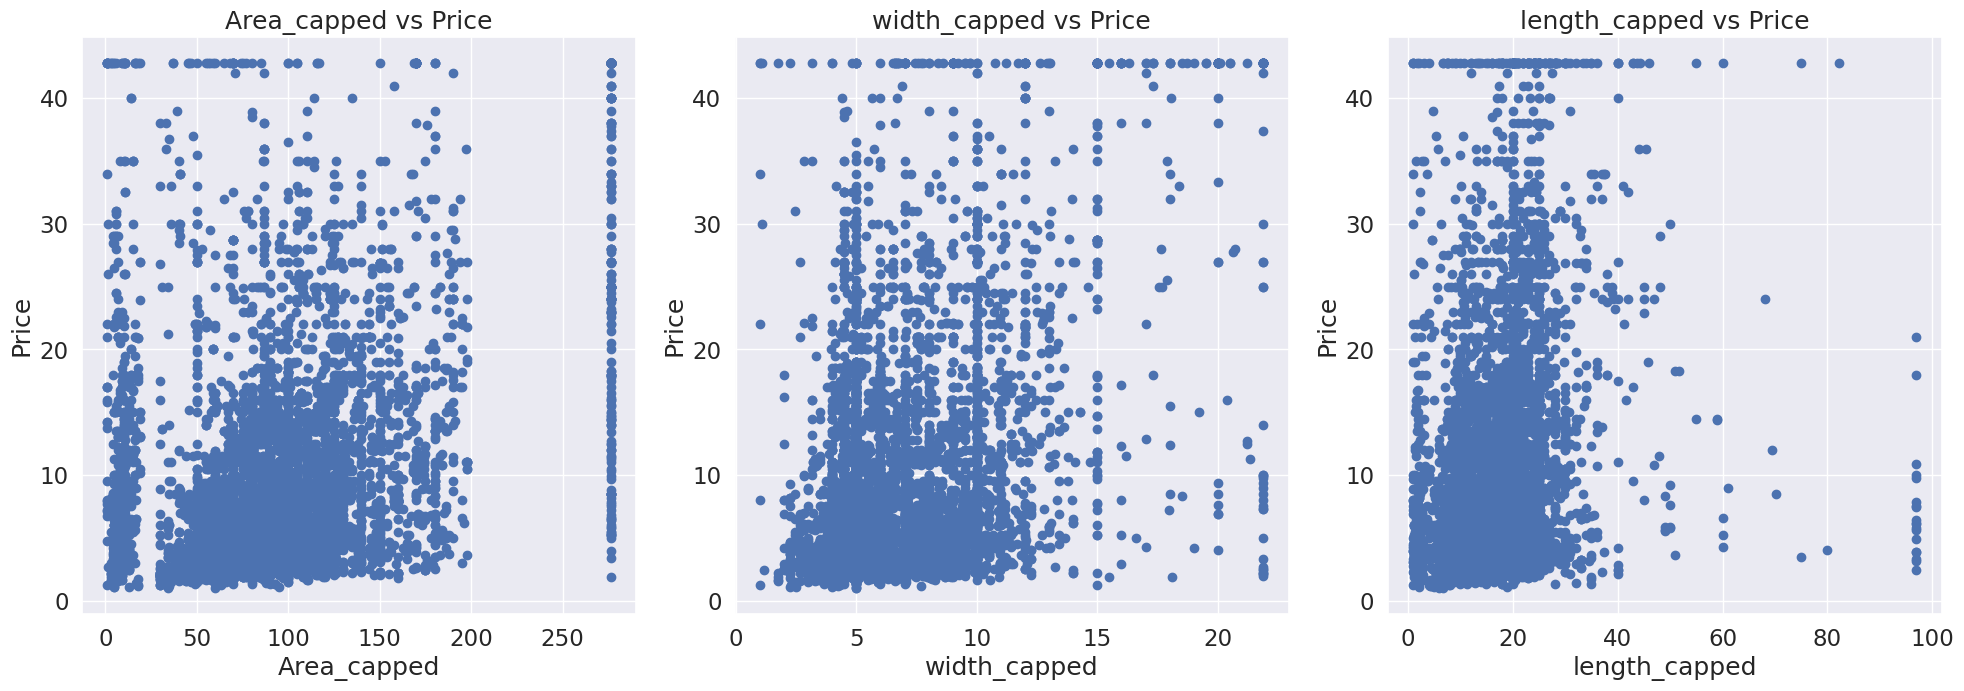

In [107]:
def scatter(x,fig):
    sns.set(font_scale = 1.5)
    plt.subplot(3,3,fig)
    plt.scatter(df[x],df['prices_capped'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('Area_capped', 1)
scatter('width_capped', 2)
scatter('length_capped', 3)
# scatter('Area', 1)
# scatter('log_width', 2)
# scatter('log_length', 3)

plt.tight_layout()


### Housing prices with distance

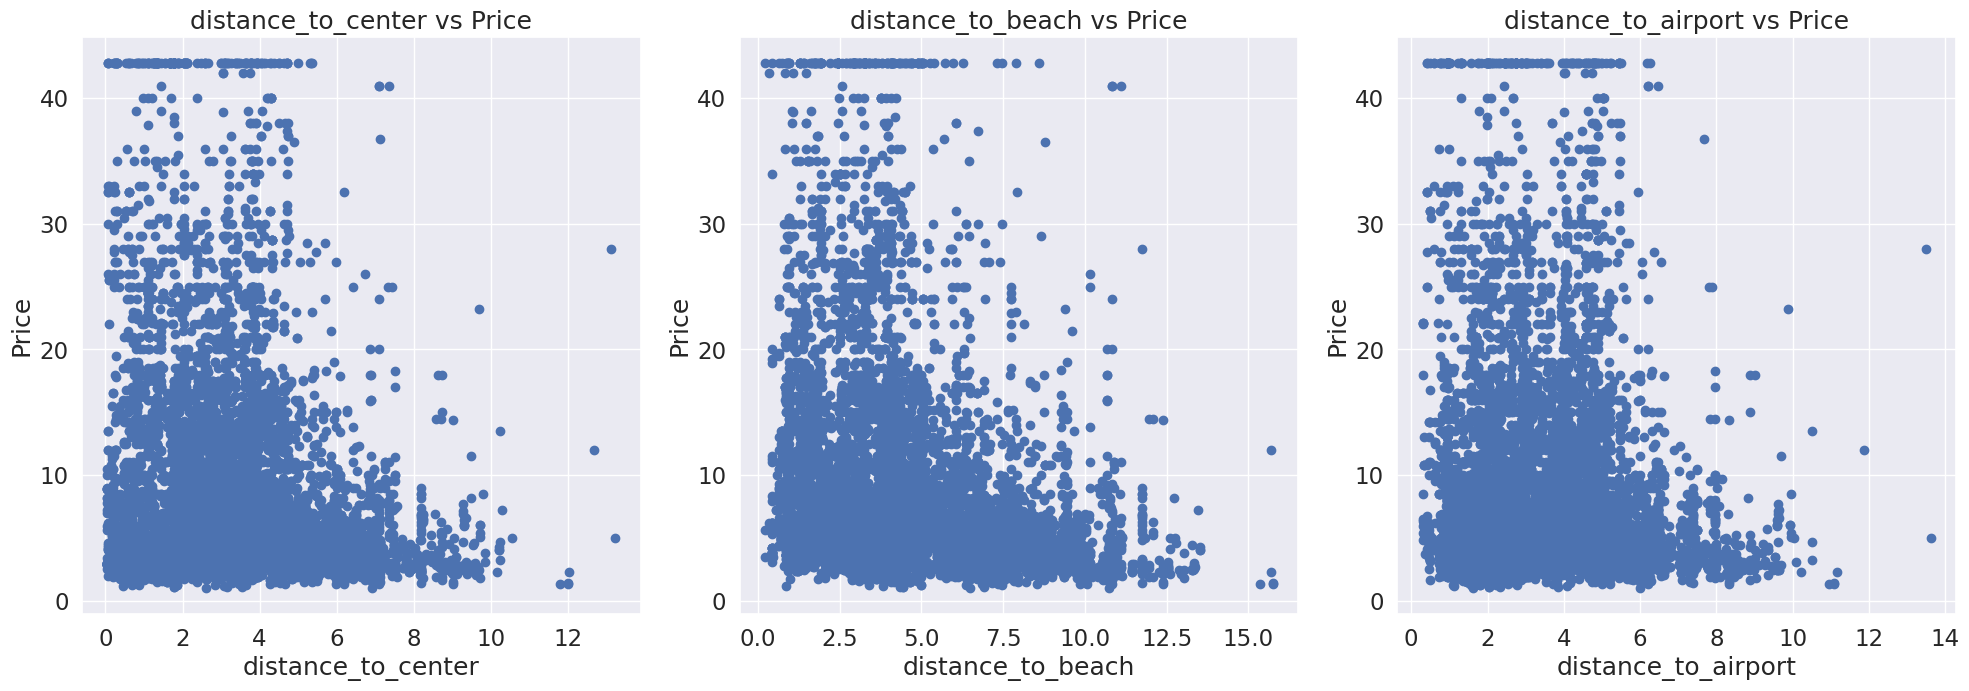

In [113]:
plt.figure(figsize=(20,20))

scatter('distance_to_center', 1)
scatter('distance_to_beach', 2)
scatter('distance_to_airport', 3)


plt.tight_layout()

### Correlation

<Axes: >

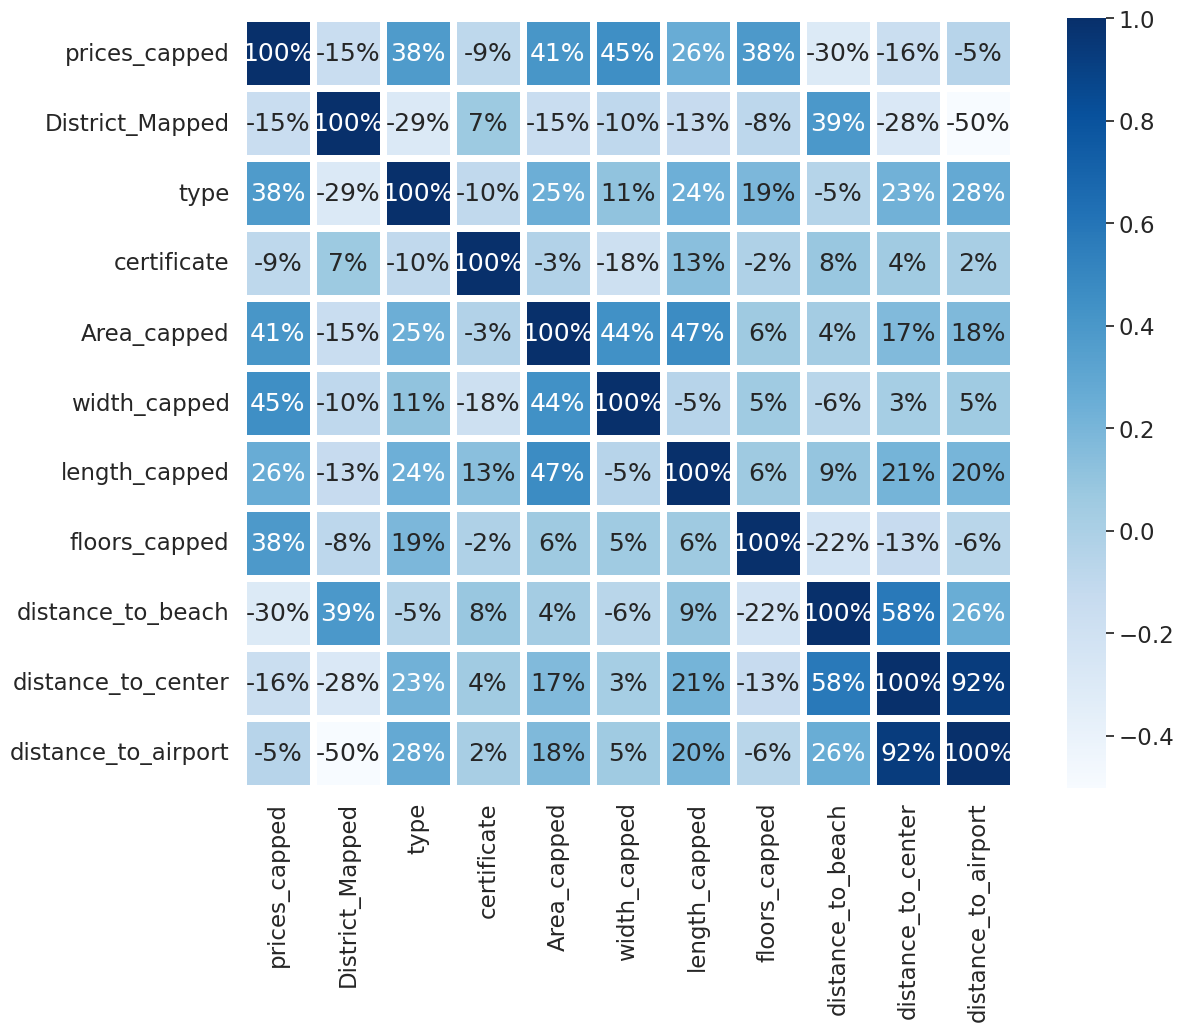

In [142]:
cols_pv = ['prices_capped','District_Mapped','type','certificate','Area_capped','width_capped','length_capped','floors_capped','distance_to_beach','distance_to_center','distance_to_airport']
plt.figure(figsize=(14, 10)) 
sns.heatmap(df[cols_pv].corr(),annot=True, linewidths=5, square=True, cmap='Blues', fmt=".0%")

### Splitting data to train

In [66]:
from sklearn.model_selection import train_test_split
cols = ['prices_capped','District_Mapped','type','certificate','Area_capped','width_capped','length_capped','floors_capped','distance_to_beach','distance_to_center','distance_to_airport']
house = df[cols]
df_train, df_test = train_test_split(house, test_size = 0.2, random_state=123)

print(df_train.shape)
print(df_test.shape)

(9029, 11)
(2258, 11)


In [67]:
X_train = df_train.copy()
X_test = df_test.copy()

print("X_train: {0}".format(X_train.shape))
print("X_test: {0}".format(X_test.shape))


X_train: (9029, 11)
X_test: (2258, 11)


In [73]:
y_train = X_train.pop('prices_capped')
y_test = X_test.pop('prices_capped')
print("Y_train: {0}".format(y_train.shape))
print("y_test: {0}".format(y_test.shape))

Y_train: (9029,)
y_test: (2258,)


In [68]:
from sklearn.preprocessing import StandardScaler,Normalizer,PowerTransformer
scaler = StandardScaler()
X_train =  pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test =  pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

<Figure size 1500x2000 with 0 Axes>

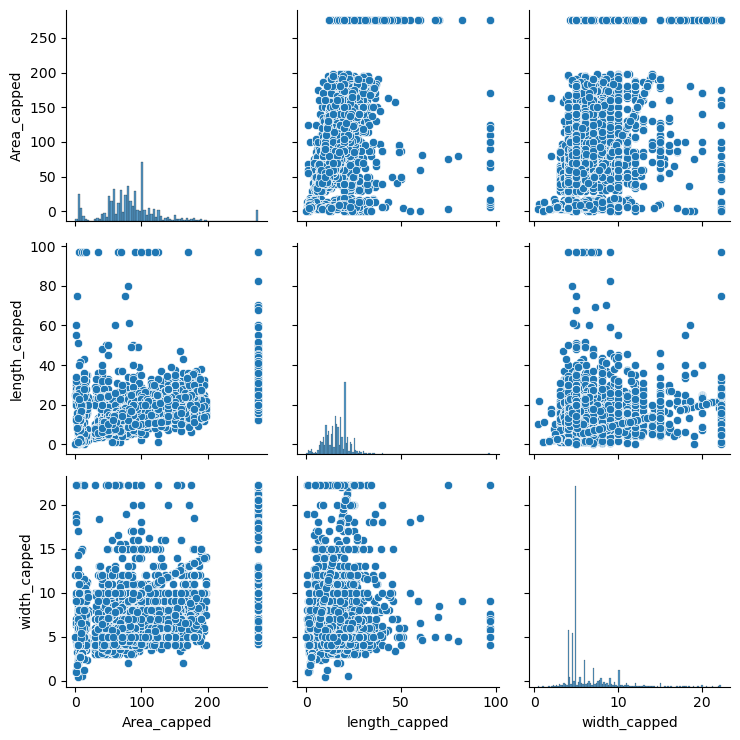

In [69]:
plt.figure(figsize=(15,20))
sns.pairplot(df[['Area_capped','length_capped','width_capped']])
plt.tight_layout()

<Figure size 1500x2000 with 0 Axes>

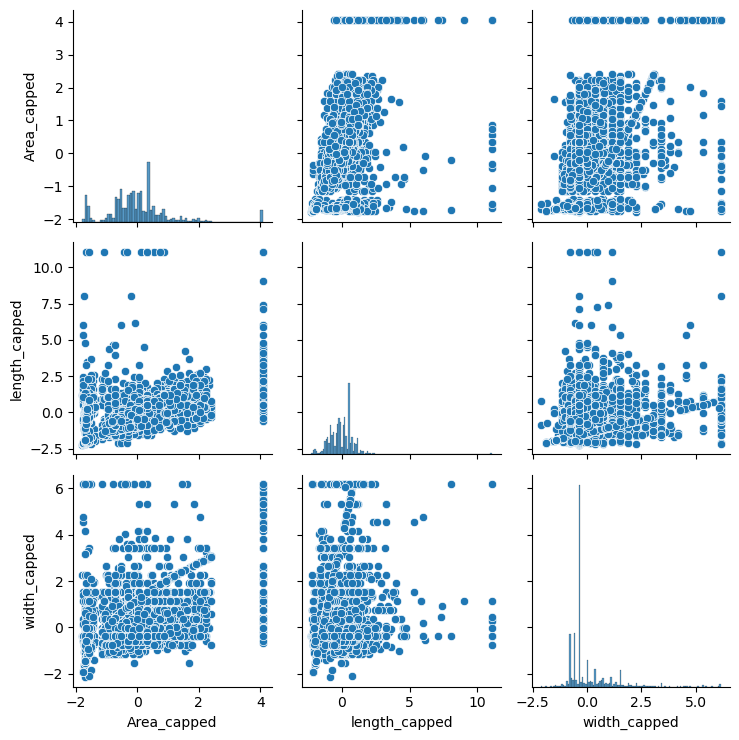

In [70]:
plt.figure(figsize=(15,20))
sns.pairplot(X_train[['Area_capped','length_capped','width_capped']])
plt.tight_layout()

In [74]:
from sklearn.linear_model import LinearRegression

# Dùng LinerRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)


LinearRegression()

In [75]:
y_pred_LR  = model_LR.predict(X_test)

In [76]:
from sklearn.metrics import make_scorer, r2_score,mean_absolute_error,mean_squared_error
r2_score_LR = r2_score(y_test,y_pred_LR)
rmse_score_LR = np.sqrt(mean_squared_error(y_test,y_pred_LR))
mae_score_LR = mean_absolute_error(y_test,y_pred_LR)
print("r2_score: ",r2_score_LR)
print("rmse_score: ",rmse_score_LR)
print("mae_score: ",mae_score_LR)

r2_score:  0.4782421801656864
rmse_score:  0.7101066929879224
mae_score:  0.4461113972075745


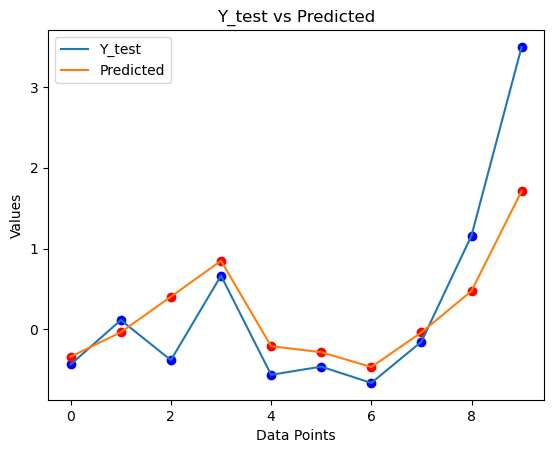

In [77]:
y_actual = y_test[:10]
y_predicted = y_pred_LR[:10]
index = range(10)

plt.plot(index,y_actual, label='Y_test')
plt.scatter(index, y_actual, color='blue')
plt.plot(index,y_predicted, label='Predicted')
plt.scatter(range(len(y_predicted)), y_predicted, color='red')

plt.xlabel('Data Points')
plt.ylabel('Values')

plt.title('Y_test vs Predicted')
plt.legend()

plt.show()